## PyTorch Tutorial #14 - Convolutional Neural Network

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Ejemplo de implementación de una red convolucional

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [5]:
# Dataset has PILImage images of range [0, 1]
# We transform them to tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5,0.5), (0.5, 0.5,0.5))])

In [6]:
# CIFAR
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, transform = transform, download = True)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, transform = transform)

100%|██████████| 170498071/170498071 [08:00<00:00, 354995.10it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


In [7]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)


torch.Size([4, 3, 32, 32]) torch.Size([4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


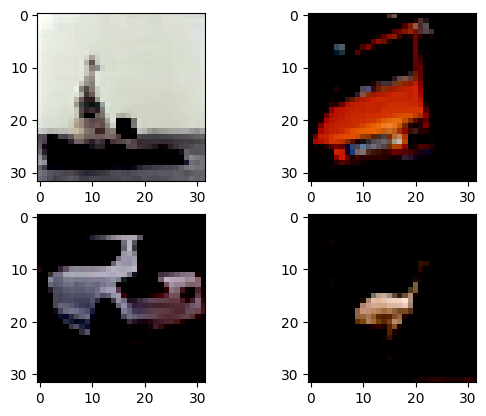

In [40]:
for i in range(4):
    img = samples[i].movedim(0, -1)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

In [50]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [51]:
model = ConvNet()
model = model.to(device)

In [52]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [54]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):        
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, steps {i+1} / {n_total_steps}, loss = {loss.item():.4f}')

print('Finished Training')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #max returns (value, index)        
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()

        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'accuracy of {classes[i]}: {acc} %')

epoch 1 / 4, steps 2000 / 12500, loss = 2.3160
epoch 1 / 4, steps 4000 / 12500, loss = 2.3112
epoch 1 / 4, steps 6000 / 12500, loss = 2.2781
epoch 1 / 4, steps 8000 / 12500, loss = 2.3098
epoch 1 / 4, steps 10000 / 12500, loss = 2.0818
epoch 1 / 4, steps 12000 / 12500, loss = 1.7090
epoch 2 / 4, steps 2000 / 12500, loss = 2.0192
epoch 2 / 4, steps 4000 / 12500, loss = 1.9831
epoch 2 / 4, steps 6000 / 12500, loss = 2.2207
epoch 2 / 4, steps 8000 / 12500, loss = 2.9704
epoch 2 / 4, steps 10000 / 12500, loss = 2.0588
epoch 2 / 4, steps 12000 / 12500, loss = 2.2774
epoch 3 / 4, steps 2000 / 12500, loss = 1.8144
epoch 3 / 4, steps 4000 / 12500, loss = 2.2029
epoch 3 / 4, steps 6000 / 12500, loss = 1.2201
epoch 3 / 4, steps 8000 / 12500, loss = 1.8591
epoch 3 / 4, steps 10000 / 12500, loss = 1.3000
epoch 3 / 4, steps 12000 / 12500, loss = 1.5606
epoch 4 / 4, steps 2000 / 12500, loss = 2.1905
epoch 4 / 4, steps 4000 / 12500, loss = 1.5735
epoch 4 / 4, steps 6000 / 12500, loss = 0.9760
epoch 4